### 예제
#### BMI 데이터를 학습한 후, 자신의 키와 몸무게를 넣어서 자신의 상태 확인하기
#### bmi.csv 파일을 가져가서 multinomial 문제를 학습해보세요

In [4]:
# 필요한 모듈 삽입


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [5]:
# data 설정



data_bmi = pd.read_csv("C:/Users/student/Desktop/머신러닝/bmi/bmi.csv", skiprows=3)
data_bmi.head

x_data = np.array(data_bmi[["height", "weight"]])
x_data = MinMaxScaler().fit_transform(x_data)
y_data = np.array(data_bmi["label"])
y_data = tf.one_hot(y_data,depth=3).eval(session=tf.Session())

x_data.shape #(20000, 2)
train_num = int(x_data.shape[0]*0.8)
test_num = x_data.shape[0]-train_num

train_x_data = x_data[:train_num]
test_x_data = x_data[train_num:]

train_y_data = y_data[:train_num]
test_y_data = y_data[train_num:]


In [16]:
## logistic regression 과정 



# palceolder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 3], dtype=tf.float32)


# weight, bias
W = tf.Variable(tf.random_normal([2,3]), name='weight')
b = tf.Variable(tf.random_normal([1,3]), name='bias')


# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)


# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                     logits = logit,
                     labels = Y))


# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)


# 학습
for step in range(30000):
    _, val_cost = sess.run([train,cost], feed_dict = {X: train_x_data,
                                                     Y: train_y_data})
    if step % 6000 == 0:
        print(f'cost값은 : {val_cost}')
        
        
# 예측, 정확도
predict = tf.argmax(H, axis=1) 
correct = tf.equal(predict, tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(f'정확도: {sess.run(accuracy, feed_dict={X: test_x_data, Y: test_y_data})}')

cost값은 : 1.5614553689956665
cost값은 : 0.28348687291145325
cost값은 : 0.22109878063201904
cost값은 : 0.19091708958148956
cost값은 : 0.17208625376224518
정확도: 0.9797499775886536


## 선생님 풀이

In [ ]:
# 필요한 모듈 삽입


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

cost값은 : 1.4271974563598633
cost값은 : 0.28417301177978516
cost값은 : 0.22137115895748138
cost값은 : 0.1910741627216339
cost값은 : 0.1721917986869812
정확도: 0.9797499775886536


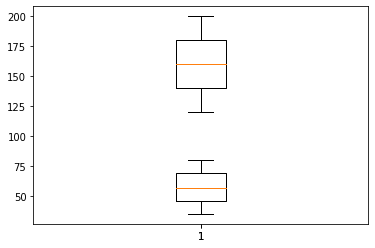

In [30]:
# data 설정


# data loading
data_df = pd.read_csv("C:/Users/student/Desktop/머신러닝/bmi/bmi.csv", skiprows=3)

# 결측치 확인
data_df.isnull().sum(axis=0) #확인결과 결측치는 없음

# 이상치 확인
plt.boxplot(data_df["height"]) #이상치 없음
plt.boxplot(data_df["weight"]) #이상치 없음

# scaler 사용한 정규화
# scaler.fit_transform: minmax를 위한 데이터를 가져오는 fit, 이를 변환하는 transform
scaler = MinMaxScaler()
x_data = scaler.fit_transform(data_df[["height", "weight"]])

# scaler가 정보를 가지고 있으며 자동으로 정규화 진행해줌
scaler.data_min_ # array([120.,  35.])
scaler.data_max_ # array([200.,  80.])

# train, test data 구분 
split_num = int(data_df.shape[0]*0.8)
train_x_data = x_data[:split_num]
test_x_data = x_data[split_num:]

# 학습용, 테스트용 y data를 생성: one hot encoding
# one hot encoding으로 전환시킬때, pandas.get dummies() 또는 tensorflow.one_hot()
# sess로 싷행을 시켜줘야지 값이 나옴!
sess = tf.Session()
# sess.run(tf.one_hot(data_df.loc[:split_num,"label"],3)).shape #(16001, 3)
# df.loc의 :는 inclusive, np.array의 :는 exclusive 이기에 shape에서 차이가 날 수 있음 주의!
train_y_data = sess.run(tf.one_hot(data_df.loc[:split_num-1,"label"],3))
test_y_data = sess.run(tf.one_hot(data_df.loc[split_num:,"label"],3))

# palceolder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 3], dtype=tf.float32)

# weight, bias
W = tf.Variable(tf.random_normal([2,3]), name='weight')
b = tf.Variable(tf.random_normal([1,3]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                     logits = logit,
                     labels = Y))

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 학습
for step in range(30000):
    _, val_cost = sess.run([train,cost], feed_dict = {X: train_x_data,
                                                     Y: train_y_data})
    if step % 6000 == 0:
        print(f'cost값은 : {val_cost}')
        
# 예측, 정확도
predict = tf.argmax(H, axis=1) 
correct = tf.equal(predict, tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(f'정확도: {sess.run(accuracy, feed_dict={X: test_x_data, Y: test_y_data})}')

In [37]:
# prediction

# 정규화를 해서 데이터를 넣지 말고, scaler 사용하면 됨
# 위에서 사용하면서 관련 정보를 저장해둠
prediction_data = scaler.transform([[168, 62]])
prediction_data #array([[0.6, 0.6]])

sess.run(H, feed_dict={X : prediction_data})
# array([[0.03564807, 0.9094091 , 0.05494288]], dtype=float32)
# 두번째의 확률이 제일 큼: 따라서 1, 즉 평균이라고 나올 확률이 가장 높다
# 보기 불편하니까 정리
result = sess.run(tf.argmax(H,1), feed_dict={X : prediction_data})

if result == 0:
    print("말랐어어어어")
elif result == 1:
    print("보통!")
elif result == 2:
    print("운동하쟛")

보통!
